In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [43]:
# Get and clean data for Subject 1 (Robert), Subject 2 (Timo), Subject 3 (Tobi), Subject 4 (Oliver), Subject 5 (Mats)
subject = '4'

PATH = 'assets/'
s = pd.read_csv(PATH + 'Subject' + subject + '/ReducedConcatenated/subject' + subject + 'all.csv')
s.replace("stehen", "Standing", inplace=True)
s.replace("sitzen", "Sitting", inplace=True)
s.replace("gehen", "Walking", inplace=True)
s.replace("rennen", "Running", inplace=True)
s.replace("liegen", "Recumbency", inplace=True)
s.replace("Nicht festgelegt", "Not Specified", inplace=True)
s.replace("springen", "Jumping", inplace=True)

In [44]:
# Check records per posture, check for NaN
s.groupby('Posture').count()

,MeanX,StdDevX,IntqrX,MeanY,StdDevY,IntqrY,MeanZ,StdDevZ,IntqrZ,CorrelationXY,CorrelationXZ,CorrelationYZ,Timestamp
Posture,,,,,,,,,,,,,
Climbing (down),174,174,174,174,174,174,174,174,174,174,174,174,174
Climbing (up),156,156,156,156,156,156,156,156,156,156,156,156,156
Jumping,1,1,1,1,1,1,1,1,1,1,1,1,1
Not Specified,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633,4633
Recumbency,5330,5330,5330,5330,5330,5330,5330,5330,5330,5330,5330,5330,5330
Running,394,394,394,394,394,394,394,394,394,394,394,394,394
Sitting,49078,49078,49078,49078,49078,49078,49078,49078,49078,49078,49078,49078,49078
Standing,14566,14566,14566,14566,14566,14566,14566,14566,14566,14566,14566,14566,14566
Walking,4240,4240,4240,4240,4240,4240,4240,4240,4240,4240,4240,4240,4240


In [48]:
sitting = s[(s['Posture'] == 'Sitting')].sample(n=500)

notSpecified = s[(s['Posture'] == 'Not Specified')].sample(n=500)

running = s[(s['Posture'] == 'Running')]

standing = s[(s['Posture'] == 'Standing')].sample(n=500)

walking = s[(s['Posture'] == 'Walking')].sample(n=500)

cDown = s[(s['Posture'] == 'Climbing (down)')]

cUp = s[(s['Posture'] == 'Climbing (up)')]

recumbency = s[(s['Posture'] == 'Recumbency')].sample(n=500)
# unknown = s[(s['Posture'] == 'unknown')]

In [49]:
# Combine all posture dataframes into one
result = pd.concat([cUp, cDown, standing, sitting, walking, running, recumbency, notSpecified])

In [50]:
result.groupby('Posture').count()

,MeanX,StdDevX,IntqrX,MeanY,StdDevY,IntqrY,MeanZ,StdDevZ,IntqrZ,CorrelationXY,CorrelationXZ,CorrelationYZ,Timestamp
Posture,,,,,,,,,,,,,
Climbing (down),174,174,174,174,174,174,174,174,174,174,174,174,174
Climbing (up),156,156,156,156,156,156,156,156,156,156,156,156,156
Not Specified,500,500,500,500,500,500,500,500,500,500,500,500,500
Recumbency,500,500,500,500,500,500,500,500,500,500,500,500,500
Running,394,394,394,394,394,394,394,394,394,394,394,394,394
Sitting,500,500,500,500,500,500,500,500,500,500,500,500,500
Standing,500,500,500,500,500,500,500,500,500,500,500,500,500
Walking,500,500,500,500,500,500,500,500,500,500,500,500,500


In [51]:
# Write subject data to CSV file
result.to_csv(PATH + 'subject' + subject + 'allSamplewoUnknown.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [15]:
# ONLY CONTINUE WHEN RECORDS CONTAIN "NaN" (i.e. different counts, same row, different column)
# Create new dataframe, where values that are "NaN" (only in Correlation??) are disregarded 
result = s[np.isfinite(s['CorrelationXY'])]

In [23]:
# Check records again
result.groupby('Posture').count()

,MeanX,StdDevX,IntqrX,MeanY,StdDevY,IntqrY,MeanZ,StdDevZ,IntqrZ,CorrelationXY,CorrelationXZ,CorrelationYZ,Timestamp
Posture,,,,,,,,,,,,,
Climbing (down),108,108,108,108,108,108,108,108,108,108,108,108,108
Climbing (up),29,29,29,29,29,29,29,29,29,29,29,29,29
Not Specified,6,6,6,6,6,6,6,6,6,6,6,6,6
Recumbency,500,500,500,500,500,500,500,500,500,500,500,500,500
Sitting,500,500,500,500,500,500,500,500,500,500,500,500,500
Standing,500,500,500,500,500,500,500,500,500,500,500,500,500
Walking,500,500,500,500,500,500,500,500,500,500,500,500,500


In [18]:
# Write new subject data to CSV file
result.to_csv(PATH + 'subject1all.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [4]:
# Get and clean data for all subjects combined
all = pd.read_csv(PATH + 'Combined/AllSubjectsCombined/all.csv', header=None)
all.replace("stehen", "Standing", inplace=True)
all.replace("sitzen", "Sitting", inplace=True)
all.replace("gehen", "Walking", inplace=True)
all.replace("rennen", "Running", inplace=True)
all.replace("liegen", "Recumbency", inplace=True)
all.replace("Nicht festgelegt", "Not Specified", inplace=True)
all.replace("springen", "Jumping", inplace=True)

In [ ]:
grouped = all.groupby(13).count()
bar = grouped[0]
bar

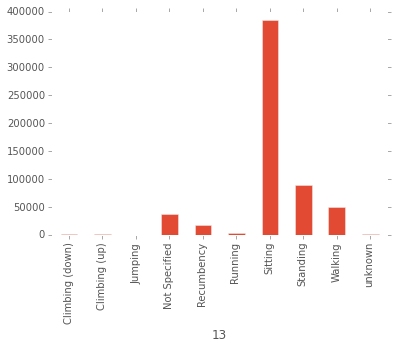

In [10]:
plt.figure()
bar.plot(kind='bar')